In [1]:
import pandas as pd
import ollama 

In [ ]:
df = pd.read_csv('feedback.csv', encoding='ISO-8859-1')
df.head(2)

In [29]:
def get_sentiment(feedback):
    response = ollama.chat(model='llama3:8b-instruct-q8_0', messages=[
    {
        'role': 'user',
        'content': f'You are an expert customer success manager. Understand the text and give the sentiment as Positive, Negative, Neutral. ONLY return the sentiment and nothing else.\n Text: {feedback}',
    },
    ])
    setiment = response['message']['content']
    return setiment.strip()

In [30]:
df['Sentiment'] = df['Description'].apply(get_sentiment)

In [32]:
def get_tags(feedback):
    response = ollama.chat(model='llama3:8b-instruct-q8_0', messages=[
    {
        'role': 'user',
        'content': f'You are an expert customer success manager. Understand the text and give 1 word tags(upto 5 tags) seperated by commas. ONLY return the tags and nothing else.\n Text: {feedback}',
    },
    ])
    tags = response['message']['content']
    return tags.strip()
df['tags'] = df['Description'].apply(get_tags)

In [ ]:
df.head(3)

In [35]:
df.to_csv('feedback_processed.csv', index=False)

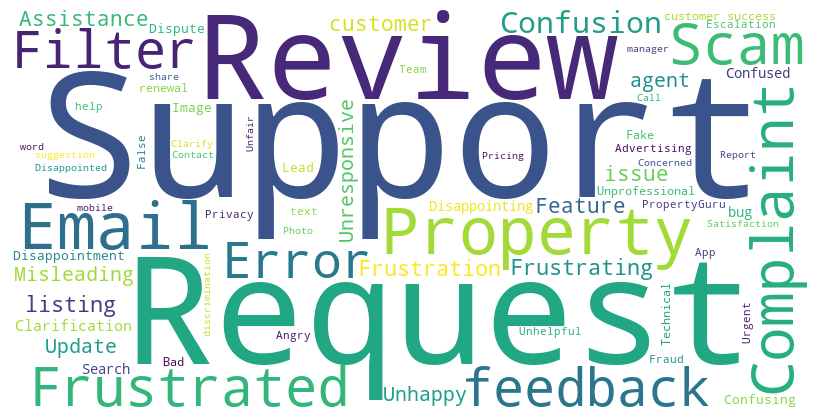

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(review for review in df.tags)
text = text.replace('Tags', '')
text = text.replace('Feedback', '')
text = text.replace('Agent', '')
text = text.replace('Customer', '')
wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color ='white',
    colormap='viridis',  # Color theme
    max_words=200,
    min_font_size = 10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
